In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
# from pandas.plotting import scatter_matrix
from sklearn.cross_validation import cross_val_score

from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['target', 'feature_names', 'target_names', 'DESCR', 'data'])

In [5]:
x = data.data
y = data.target
x = x[:, [0,1]]

0.666666666667


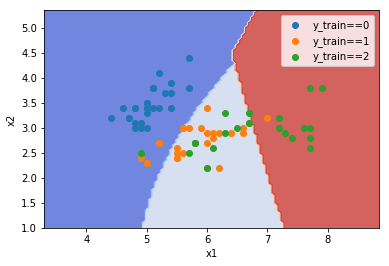

In [34]:

# 用train_test_split 将数据分为训练集和测试集
# test_size 测试集的占所有数据的份额， e.g. test_size=0.5 50%的数据为测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

#用线性svm拟合训练数据
clf = svm.SVC(kernel='poly', C= 0.0001).fit(x_train, y_train)

# 预测值
y_pred = clf.predict(x_test)

# 进行一次模型校验
# 模型误差，正确率
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

# # 交叉验证
# from sklearn.model_selection import cross_val_score
# cvscore = cross_val_score(svm.SVC(kernel='linear'), x, y=y)
# print(cvscore)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

plt.subplot(111)
plt.subplots_adjust(wspace=0.6, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.xlabel('')
plt.ylabel('')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# plot the line, the points, and the nearest vectors to the plane

plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(x=x_train[:,0][y_train==0], y=x_train[:,1][y_train==0], label='y_train==0')
plt.scatter(x=x_train[:,0][y_train==1], y=x_train[:,1][y_train==1], label='y_train==1')
plt.scatter(x=x_train[:,0][y_train==2], y=x_train[:,1][y_train==2], label='y_train==2')

plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
credit = pd.read_csv('credit_risk.csv')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

mtrx = credit.as_matrix()
print(mtrx.shape)
x = mtrx[:, :-1]
y = mtrx[:, -1]

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x, y)
# requires additional installation of graphviz
file_name = 'credit_risk.dot'
tree.export_graphviz(clf, out_file=file_name, impurity=True, node_ids=True, 
                     class_names=['good', 'bad'], feature_names=credit.columns[[0,1]])
from subprocess import check_call
check_call(['dot', '-Tpng', file_name, '-o', file_name + '.png'])

TODO: check http://scikit-learn.org/stable/datasets/index.html#toy-datasets for toy datasets, load each of them <br>
train-test split data<br>
run classification algorithms on the dataset<br>
try following metrics:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
<br>


In [21]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
x = digits.data
y = digits.target
print(x.shape, y.shape)

(1797, 64) (1797,)


In [9]:
import matplotlib.pyplot as plt
x[0]
print(type(x[0]), x[0].shape)

<class 'numpy.ndarray'> (64,)


In [10]:
x[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

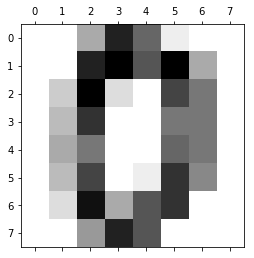

In [19]:
plt.matshow(x[0, :].reshape(8,8), cmap='binary')

In [22]:
# 所有的类的，y是类型变量 
classes = np.unique(y)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
# np unique找出独特的元素
np.unique([6,6,6,4,2,6,1])

array([1, 2, 4, 6])

In [25]:
# 类的个数，也即y的cardinality
n_classes = len(classes)
n_classes

10

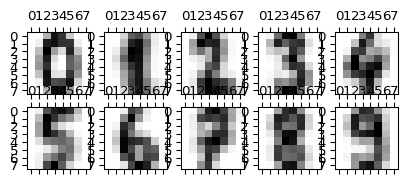

In [31]:
fig = plt.figure(figsize=(5,5), dpi=96)
for i, cls in enumerate(classes):
    row = x[y==cls].mean(axis=0)
    ax = fig.add_subplot(5,5,i+1)
    ax.matshow(row.reshape(8,8), cmap='binary')

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# 用train_test_split 将数据分为训练集和测试集
# test_size 测试集的占所有数据的份额， e.g. test_size=0.5 50%的数据为测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

#用ploy svm拟合训练数据
clf = svm.SVC(kernel='linear', C=10).fit(x_train, y_train)

# 预测值
y_pred = clf.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
cmtrx = confusion_matrix(y_test, y_pred)
cmtrx

array([[90,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 74,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 91,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 94,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 91,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 84,  1,  0,  0,  1],
       [ 2,  1,  0,  0,  0,  0, 94,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 91,  0,  1],
       [ 0,  2,  0,  0,  1,  3,  0,  0, 83,  0],
       [ 1,  0,  0,  1,  0,  2,  0,  0,  1, 86]])

In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print(precision_score(y_test, y_pred, average='macro'), 
      recall_score(y_test, y_pred, average='macro'),  
      accuracy_score(y_test, y_pred))

0.976148774884 0.976832483211 0.976640711902


In [50]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, y_pred)

ValueError: Data is not binary and pos_label is not specified